In [7]:
from scipy.stats import t
import math
t_95 = t.ppf(1-(1-0.95)/2,df=20-1)
import os
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name =='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"
sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [3]:
t_95

2.093024054408263

In [8]:
np.random.seed(100)

math_score = pd.DataFrame(np.random.randint(25,101,size=500),columns=['점수'])

In [11]:
scores=np.array(math_score['점수'])
scores[:5]
sample = np.random.choice(scores,20)
print(sample)
print(sample.mean())
print(sample.var())
print(sample.std())
sample_score = np.random.choice(scores,10000)

[99 81 90 92 68 76 54 97 41 32 69 25 42 77 64 44 44 85 65 95]
67.0
504.9
22.469979973288805


In [12]:
n =20
nSample=100
sample_mean = np.array([np.random.choice(scores,n,).mean() for _ in range(nSample)])

In [15]:
sMean = sample_mean.mean()
sStd = sample_mean.std()

Low_c = sMean-t_95*(sStd/math.sqrt(n))
Upper_c=sMean+t_95*(sStd/math.sqrt(n))
print(Low_c)
print(Upper_c)
print('신뢰구간:',Upper_c-Low_c)

59.3279302975796
64.26206970242042
신뢰구간: 4.9341394048408205


In [19]:
z_n = 30
sample1= np.random.choice(scores,n)
z_sMean = sample1.mean()
z_sStd = sample1.std()

print('모평균',scores.mean())
print('표본평균',z_sMean)
print('모편차',scores.std())
print('표본편차', z_sStd)

모평균 61.58
표본평균 58.9
모편차 21.491849617936563
표본편차 21.512554474073973


In [20]:
z_95 = stats.norm.ppf(1-(1-0.95)/2)

z_95_h = stats.norm.ppf(0.95)

In [22]:
L_value_1 = round(z_sMean-z_95*(scores.std()/math.sqrt(z_n)),2)
U_value_1 = round(z_sMean+z_95*(scores.std()/math.sqrt(z_n)),2)
print(L_value_1)
print(U_value_1)

print('신뢰구간:',U_value_1-L_value_1)

51.21
66.59
신뢰구간: 15.380000000000003


In [23]:
mStd = 5
mMean =205
n =49
z_95_1=stats.norm.ppf(1-(1-0.95)/2)

L_value=round(mMean-z_95_1*(mStd/math.sqrt(n)),2)
U_value=round(mMean+z_95_1*(mStd/math.sqrt(n)),2)

print('신뢰구간:',L_value,'~',U_value)
print('신뢰구간 길이:', U_value-L_value)
print('{}<{}<{}'.format(L_value,mMean,U_value))

신뢰구간: 203.6 ~ 206.4
신뢰구간 길이: 2.8000000000000114
203.6<205<206.4


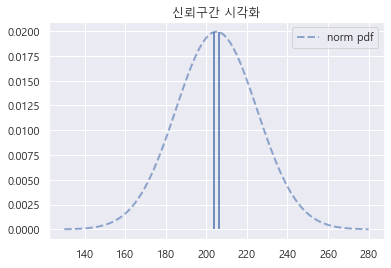

In [25]:
standard_norm = stats.norm(205,20)

x=np.linspace(130,280,100)

plt.vlines(L_value,0,standard_norm.pdf(L_value),colors='b')
plt.vlines(U_value,0,standard_norm.pdf(U_value),colors='b')
plt.plot(x,standard_norm.pdf(x),'b--',lw=2,alpha=0.6,label='norm pdf')

plt.title("신뢰구간 시각화")
plt.legend()
plt.show()